In [1]:
import numpy as np
import os
from pathlib import Path
from keras.preprocessing import image 
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


In [41]:
labels = pd.read_csv("Train/train.csv")

In [42]:
labels_array = np.array(labels.values)
labels_array[2]

array(['298.jpg', 'Pikachu'], dtype=object)

In [43]:
m = labels_array.shape
print(m)
labels_dict = {}
for img_data in labels_array:
    labels_dict[img_data[0]] = img_data[1]

(304, 2)


In [44]:
p = Path("Train/Images")

dirs = p.glob("*")

labels_id = {"Bulbasaur" : 0 ,"Pikachu" : 1, "Charmander" : 2}
image_data = []
labels_data = []

for img_path in dirs:
    labels_name = str(img_path).split("/")[-1]
    img = image.load_img(img_path,target_size=(50,50))
    img_array = image.img_to_array(img)
    image_data.append(img_array)
    lid = labels_dict[labels_name] 
    labels_data.append(labels_id[lid])


In [45]:
image_data = np.array(image_data,dtype = 'float32')
labels_data = np.array(labels_data)
labels_data = labels_data.reshape(-1,1)
image_data = image_data.reshape(304,-1)
print(image_data[1].shape,labels_data.shape)

(7500,) (304, 1)


In [48]:
X = np.array(image_data)
Y = np.array(labels_data)
X = X/255.0
print(X.shape)

(304, 7500)


In [49]:
def drawImg(img):
    plt.imshow(img)
    plt.show()
    return

# Testing Data

In [50]:
Test_labels = pd.read_csv("Test/test.csv")
Test_labels_array = np.array(Test_labels.values)
Test_labels_array[2]

array(['1131.jpg'], dtype=object)

In [51]:
p = Path("Test/Images")

test_dirs = p.glob("*")

test_image_data = {}

for img_path in test_dirs:
    labels_name = str(img_path).split("/")[-1]
    img = image.load_img(img_path,target_size=(50,50))
    img_array = image.img_to_array(img)
    img_array = img_array/255.0
    img_array = img_array.reshape(1,-1)
    test_image_data[labels_name] = img_array

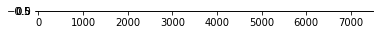

In [52]:
drawImg(test_image_data['1131.jpg'])

In [53]:
def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [54]:
Y_hot = []
for i in Y:
    #print(i)
    Y_hot.append(one_hot(i,3))


In [58]:
Y = np.array(Y_hot)
Y = Y.reshape(304,3)

# CNN 

In [36]:
from keras.layers import *
from keras.models import Sequential

In [39]:
# Build a Model

model = Sequential()
model.add(Dense(64,activation = 'relu' , input_shape = (7500,)))
model.add(Dense(64,activation = 'relu'))

model.add(Dense(3,activation = 'softmax' ))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                480064    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 195       
Total params: 484,419
Trainable params: 484,419
Non-trainable params: 0
_________________________________________________________________


In [59]:
# Model Compilation
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
hist = model.fit(X,Y,epochs=200,batch_size=512)

W0801 20:57:13.527021 140703911077696 deprecation.py:323] From /home/shubby/.local/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0801 20:57:13.570446 140703911077696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/Keras-2.2.4-py3.6.egg/keras/backend/tensorflow_backend.py:1021: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/200
304/304 [==============================] - 0s 1ms/step - loss: 1.1051 - acc: 0.3947
Epoch 2/200
304/304 [==============================] - 0s 98us/step - loss: 3.4608 - acc: 0.3355
Epoch 3/200
304/304 [==============================] - 0s 60us/step - loss: 2.0674 - acc: 0.3355
Epoch 4/200
304/304 [==============================] - 0s 42us/step - loss: 3.4863 - acc: 0.3421
Epoch 5/200
304/304 [==============================] - 0s 55us/step - loss: 2.6659 - acc: 0.3783
Epoch 6/200
304/304 [==============================] - 0s 61us/step - loss: 1.0475 - acc: 0.4375
Epoch 7/200
304/304 [==============================] - 0s 70us/step - loss: 1.5494 - acc: 0.4868
Epoch 8/200
304/304 [==============================] - 0s 55us/step - loss: 1.7123 - acc: 0.5066
Epoch 9/200
304/304 [==============================] - 0s 65us/step - loss: 1.4588 - acc: 0.4803
Epoch 10/200
304/304 [==============================] - 0s 60us/step - loss: 0.9987 - acc: 0.5000
Epoch 11/200
304/304 [========

Epoch 85/200
304/304 [==============================] - 0s 69us/step - loss: 0.0380 - acc: 0.9934
Epoch 86/200
304/304 [==============================] - 0s 73us/step - loss: 0.0361 - acc: 0.9934
Epoch 87/200
304/304 [==============================] - 0s 64us/step - loss: 0.0344 - acc: 0.9901
Epoch 88/200
304/304 [==============================] - 0s 95us/step - loss: 0.0329 - acc: 0.9934
Epoch 89/200
304/304 [==============================] - 0s 60us/step - loss: 0.0315 - acc: 0.9934
Epoch 90/200
304/304 [==============================] - 0s 65us/step - loss: 0.0300 - acc: 0.9934
Epoch 91/200
304/304 [==============================] - 0s 72us/step - loss: 0.0287 - acc: 0.9934
Epoch 92/200
304/304 [==============================] - 0s 48us/step - loss: 0.0275 - acc: 0.9934
Epoch 93/200
304/304 [==============================] - 0s 54us/step - loss: 0.0257 - acc: 0.9934
Epoch 94/200
304/304 [==============================] - 0s 53us/step - loss: 0.0237 - acc: 1.0000
Epoch 95/200
304/304

Epoch 168/200
304/304 [==============================] - 0s 104us/step - loss: 0.0023 - acc: 1.0000
Epoch 169/200
304/304 [==============================] - 0s 65us/step - loss: 0.0023 - acc: 1.0000
Epoch 170/200
304/304 [==============================] - 0s 81us/step - loss: 0.0023 - acc: 1.0000
Epoch 171/200
304/304 [==============================] - 0s 72us/step - loss: 0.0022 - acc: 1.0000
Epoch 172/200
304/304 [==============================] - 0s 76us/step - loss: 0.0022 - acc: 1.0000
Epoch 173/200
304/304 [==============================] - 0s 70us/step - loss: 0.0022 - acc: 1.0000
Epoch 174/200
304/304 [==============================] - 0s 65us/step - loss: 0.0021 - acc: 1.0000
Epoch 175/200
304/304 [==============================] - 0s 81us/step - loss: 0.0021 - acc: 1.0000
Epoch 176/200
304/304 [==============================] - 0s 71us/step - loss: 0.0021 - acc: 1.0000
Epoch 177/200
304/304 [==============================] - 0s 63us/step - loss: 0.0021 - acc: 1.0000
Epoch 178

In [60]:
h = hist.history

In [61]:
h.keys()

dict_keys(['loss', 'acc'])

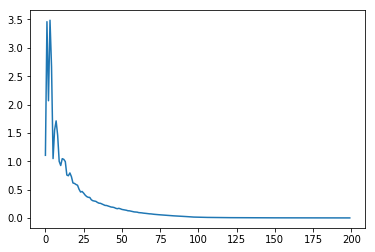

In [62]:
plt.plot(h['loss'])

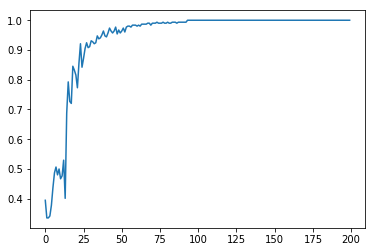

In [63]:
plt.plot(h['acc'])

In [72]:
result = []
rev_labels_id = {0 :"Bulbasaur"  , 1 : "Pikachu" ,2 : "Charmander" }
for test_img in test_image_data:
    #print(test_img)
    img = test_image_data[test_img]
    #img = img.reshape(1,-1)
    pred = model.predict_classes(img)
    label = rev_labels_id[pred[0]] 
    result.append([test_img,label])

In [73]:
result

[['1100.jpg', 'Bulbasaur'],
 ['1101.jpg', 'Bulbasaur'],
 ['1102.jpg', 'Bulbasaur'],
 ['1103.jpg', 'Bulbasaur'],
 ['1104.jpg', 'Bulbasaur'],
 ['1105.jpg', 'Bulbasaur'],
 ['1106.jpg', 'Bulbasaur'],
 ['1107.jpg', 'Bulbasaur'],
 ['1108.jpg', 'Bulbasaur'],
 ['1109.jpg', 'Bulbasaur'],
 ['1110.jpg', 'Bulbasaur'],
 ['1111.jpg', 'Bulbasaur'],
 ['1112.jpg', 'Bulbasaur'],
 ['1113.jpg', 'Bulbasaur'],
 ['1114.jpg', 'Bulbasaur'],
 ['1115.jpg', 'Bulbasaur'],
 ['1116.jpg', 'Bulbasaur'],
 ['1117.jpg', 'Bulbasaur'],
 ['1118.jpg', 'Bulbasaur'],
 ['1120.jpg', 'Bulbasaur'],
 ['1121.jpg', 'Bulbasaur'],
 ['1122.jpg', 'Bulbasaur'],
 ['1123.jpg', 'Bulbasaur'],
 ['1124.jpg', 'Bulbasaur'],
 ['1125.jpg', 'Bulbasaur'],
 ['1126.jpg', 'Bulbasaur'],
 ['1127.jpg', 'Bulbasaur'],
 ['1128.jpg', 'Bulbasaur'],
 ['1129.jpg', 'Bulbasaur'],
 ['1130.jpg', 'Bulbasaur'],
 ['1131.jpg', 'Bulbasaur'],
 ['1132.jpg', 'Bulbasaur'],
 ['1133.jpg', 'Bulbasaur'],
 ['1134.jpg', 'Bulbasaur'],
 ['1135.jpg', 'Bulbasaur'],
 ['1136.jpg', 'Bulba

In [74]:
model.predict_classes(test_image_data['2214.jpg'])

array([2])

In [75]:
pred_result = pd.DataFrame(result,columns = ["ImageId" , "NameOfPokemon"])
pred_result.head(5)

,ImageId,NameOfPokemon
0,1100.jpg,Bulbasaur
1,1101.jpg,Bulbasaur
2,1102.jpg,Bulbasaur
3,1103.jpg,Bulbasaur
4,1104.jpg,Bulbasaur


In [76]:
pred_result.to_csv("Test/predMLP.csv",index = False)